In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
np.random.seed(1)

alpha=0.1

budget_list = [10**6, 10**7, 10**8]
a,b = (0.4, 0.6)

min_epsilon=0.005
max_epsilon=0.1
epsilon_step_size = 0.001
epsilon_list = np.arange(min_epsilon, max_epsilon, epsilon_step_size)

ls_dict = {budget_list[0]: '-', budget_list[1]: '--', budget_list[2]: ':'}
color_dict = {'simulated': 'tab:green', 'analytical': 'k', 'estimated': 'tab:blue'}
label_dict = {'simulated': 'simulated', 'analytical': 'analytical\n(u.b. / l.b.)', 'estimated': 'estimated\n(u.b. / l.b.)'}

fig, axs = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)

#- Size
power_dict = pickle.load(open('data/evaluating_size_bounds.p', 'rb'))
ax=axs[0]
for budget in budget_list:
    for method in ['simulated', 'analytical', 'estimated']:
        values = np.array(list(power_dict[(a,b)][budget][method].values())).flatten()
        ax.plot(epsilon_list[::3], values[::3], ls=ls_dict[budget], lw=3, c=color_dict[method])

xlim, ylim = ax.get_xlim(), ax.get_ylim()
for method, color in color_dict.items():
    ax.scatter(-150, -150, c=color, label=label_dict[method])

for budget, ls in ls_dict.items():
    ax.axhline(-100, c='k', label=f'10^{int(np.log10(budget))}', ls=ls, lw=3)

ax.axhline(alpha, c='tab:red', lw=3)


ax.set_ylim(*ylim), ax.set_xlim(*xlim)
ax.set_title('Type I Error', fontsize=22)
ax.set_ylabel(r'$\mathbb{P}[T_{mr} > \epsilon]$', fontsize=22)
ax.set_xlabel(r'Rejection threshold ($\epsilon $)', fontsize=22)
ax.set_xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])
ax.set_yticks([0,0.1, 0.2,0.4,0.6, 0.8, 1])
ax.tick_params(labelsize=19)



#- Power
power_dict = pickle.load(open('data/evaluating_power_bounds.p', 'rb'))
ax=axs[1]
for budget in budget_list:
    for method in ['simulated', 'analytical', 'estimated']:
        values = np.array(list(power_dict[(a,b)][budget][method].values())).flatten()
        ax.plot(epsilon_list[::3], values[::3], ls=ls_dict[budget], lw=3, c=color_dict[method])

ax.set_title('Power', fontsize=22)
ax.set_ylim(*ylim), ax.set_xlim(*xlim)
ax.set_xlabel(r'Rejection threshold ($\epsilon $)', fontsize=22)
ax.set_xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])
ax.tick_params(labelsize=19)

fig.suptitle('Evaluating derived bounds\n' + r'($\alpha$=0.1;' + f' (a,b)=({a},{b}))', fontsize=23, y=0.97)
plt.tight_layout()
# axs[0].legend(loc='lower left', bbox_to_anchor=(0.15,-0.53), ncols=6, fontsize=16)
# First legend: colors
color_lines = [plt.Line2D([0], [0], marker="o", color=c, linestyle="None", markersize=8) for c in color_dict.values()]
leg1 = axs[0].legend(color_lines, label_dict.values(), title="method", loc="upper right", fontsize=16, title_fontsize=18)

# Second legend: linestyles
style_lines = [plt.Line2D([0], [0], color="k", lw=2, ls=ls) for ls in ls_dict.values()]
leg2 = axs[0].legend(style_lines, [f'10^{int(np.log10(budget))}' for budget in budget_list], title="budget", loc="upper center", bbox_to_anchor=(0,0,1.1,1), fontsize=16, title_fontsize=18)

axs[0].add_artist(leg1)

plt.savefig('figures/evaluating_bounds.pdf')

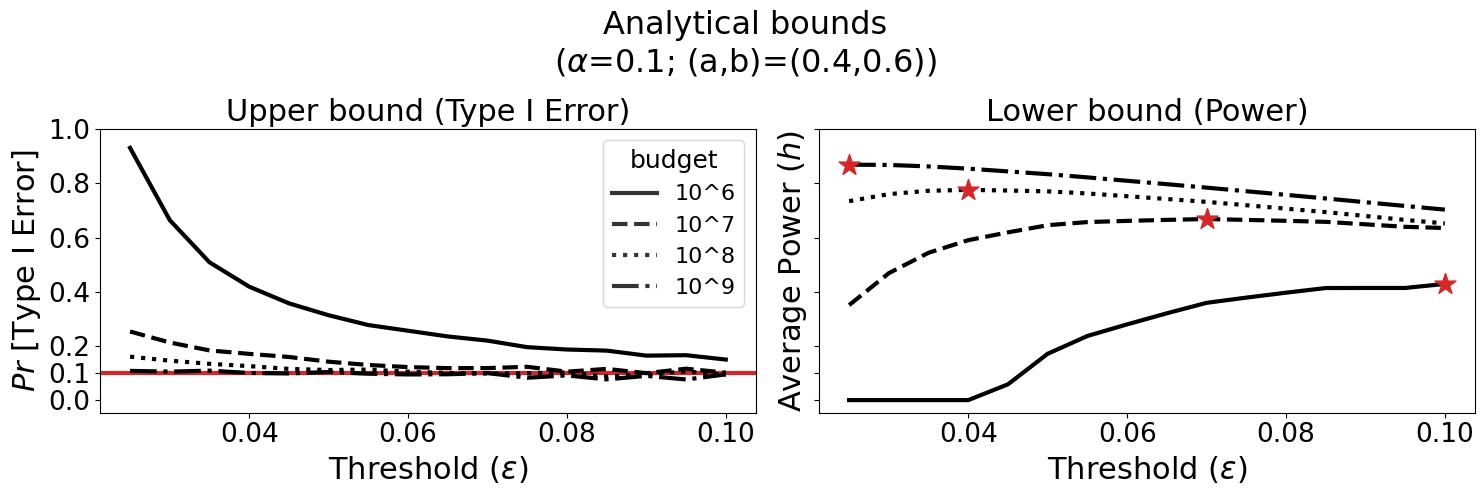

In [60]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
color_dict = {''}

a,b = (0.4, 0.6)
alpha=0.1

min_epsilon=0.005
max_epsilon=0.1
epsilon_step_size = 0.001
epsilon_list = np.arange(min_epsilon, max_epsilon, epsilon_step_size)

color_list = ['k', 'k']


for budget in budget_list:
    if budget not in ls_dict:
        continue
    
    average_approximate_power_list = []
    std_approximate_power_list = []

    average_size_list = []
    std_size_list = []
    
        
    for epsilon in epsilon_list:
        average_approximate_power_list.append(np.mean(power_dict[(a,b)][budget][epsilon]))
        std_approximate_power_list.append(np.std(power_dict[(a,b)][budget][epsilon]) / np.sqrt(len(power_dict[(a,b)][budget][epsilon])))

        average_size_list.append(np.mean(size_dict[(a,b)][budget][epsilon]))
        std_size_list.append(np.std(size_dict[(a,b)][budget][epsilon]) / np.sqrt(len(size_dict[(a,b)][budget][epsilon])))

    ax[0].errorbar(epsilon_list, average_size_list, std_size_list, lw=3, ls=ls_dict[budget], c=color_list[1])
    ax[1].errorbar(epsilon_list, average_approximate_power_list, std_approximate_power_list, lw=3, ls=ls_dict[budget], c=color_list[1])


    argmax = np.argmax(average_approximate_power_list)
    ax[1].scatter(epsilon_list[argmax], average_approximate_power_list[argmax], marker='*', s=250, c='tab:red', zorder=100)

xlim, ylim = ax[0].get_xlim(), ax[0].get_ylim()
for budget in budget_list:
    if budget not in ls_dict:
        continue
    ax[0].axhline(y=-10, c='k', ls=ls_dict[budget], label=f'10^{int(np.log10(budget))}', lw=3, alpha=0.8)

ax[0].set_xlim(*xlim), ax[0].set_ylim(*ylim)

ax[0].set_xlabel(r'Threshold ($\epsilon$)', fontsize=22)
ax[1].set_xlabel(r'Threshold ($\epsilon$)', fontsize=22)
ax[0].tick_params(labelsize=19)
ax[1].tick_params(labelsize=19)

# ax.set_title(f'(a,b)=({a}, {b})', fontsize=18)
# ax.set_xticks([0.05, 0.1, 0.15, 0.2])
# ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# ax.set_ylim(-0.01, 1.01)

ax[0].legend(fontsize=16, loc='upper right', title=r'budget', title_fontsize=18)
ax[1].set_ylabel(r'Average Power ($h$)', fontsize=22)
ax[0].set_ylabel(r'$Pr$ [Type I Error]', fontsize=22)
ax[0].set_yticks([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1])

ax[0].set_title('Upper bound (Type I Error)', fontsize=22)
ax[1].set_title('Lower bound (Power)', fontsize=22)


fig.suptitle('Analytical bounds\n' + r'($\alpha$=0.1;' + f' (a,b)=({a},{b}))', fontsize=23, y=0.98)
ax[0].axhline(y=alpha, c='tab:red', lw=3)
plt.tight_layout()
# plt.
plt.savefig('figures/analytical_bounds.pdf', bbox_inches='tight')

Text(0.5, 1.09, 'Analytical lower bound (Power)\n($\\alpha$=0.1)')

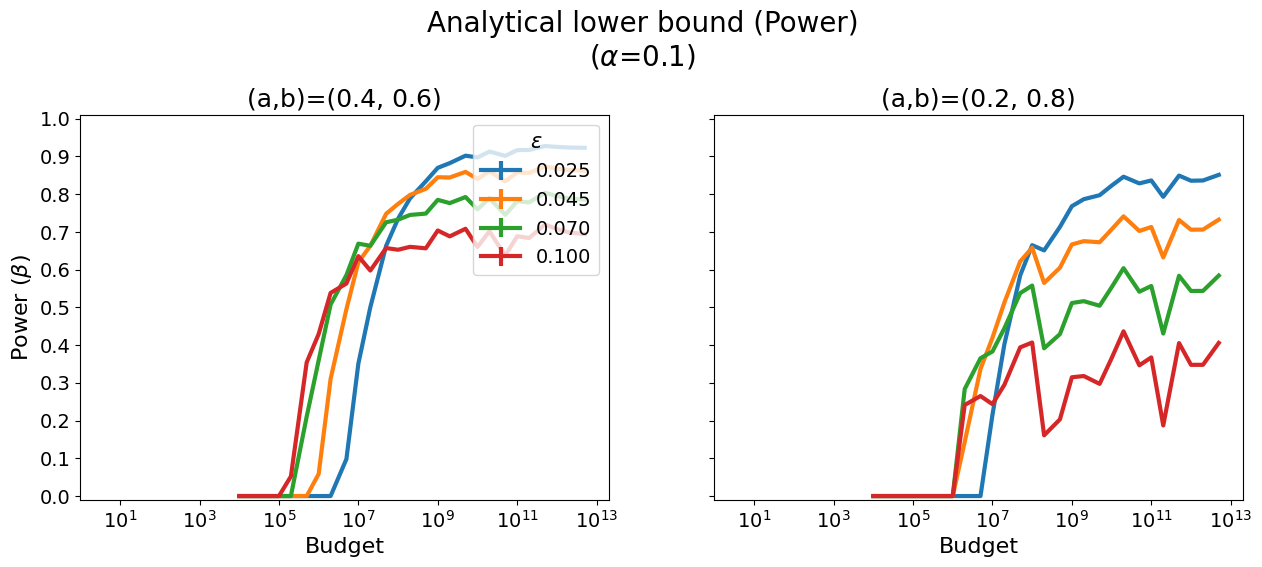

In [59]:
fig, ax_ = plt.subplots(1,len(a_b_list), figsize=(15,5), sharex=True, sharey=True)

for i,(a,b) in enumerate(a_b_list):
    ax = ax_[i]
    ax.set_xscale('log')
    for epsilon in reduced_epsilon_list:
        epsilon = np.array(epsilon_list)[abs(epsilon - np.array(epsilon_list)) < epsilon_step_size][0]
        average_approximate_power_list = []
        std_approximate_power_list = []
        
        for budget in budget_list:
            average_approximate_power_list.append(np.mean(power_dict[(a,b)][budget][epsilon]))
            std_approximate_power_list.append(np.std(power_dict[(a,b)][budget][epsilon]) / np.sqrt(len(power_dict[(a,b)][budget][epsilon])))
        
    
        ax.errorbar(budget_list, average_approximate_power_list, std_approximate_power_list, lw=3, label=f'{epsilon:1.3f}')

    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    
    # ax.set_xlim(*xlim), ax.set_ylim(*ylim)
    
    ax.set_xlabel('Budget', fontsize=16)
    ax.tick_params(labelsize=14)
    
    ax.set_title(f'(a,b)=({a}, {b})', fontsize=18)
    # ax.set_xticks([0.05, 0.1, 0.15, 0.2])
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.set_ylim(-0.01, 1.01)

ax_[0].legend(fontsize=14, loc='upper right', title=r'$\epsilon$', title_fontsize=15)
ax_[0].set_ylabel(r'Power ($\beta$)', fontsize=16)


fig.suptitle('Analytical lower bound (Power)\n' + r'($\alpha$=0.1)', fontsize=20, y=1.09)